<a href="https://colab.research.google.com/github/edusgr/EDP-1/blob/main/ecuacion%20de%20onda%20bidimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Resolucion de la ecuación de onda bidimensional** en un rectangulo de lados $a = 4$, $b = 2$,  condiciones iniciales dadas por una deflexion:

$$
f(x,y) = 0.1(4x - x^2)(2y - y^2)
$$

y velocidad inicial $g(x, y) = 0$.

Usamos separación de variables para obtener la solución



La forma de la ecuacion de onda en dos dimensiones es:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

el problema presenta las siguientes condiciones de frontera:

$$
u(0, y, t) = u(a, y, t) = u(x, 0, t) = u(x, b, t) = 0
$$


$$
u(x, y, 0) = f(x, y), \quad u_t(x, y, 0) = g(x, y)
$$

Donde despues de aplicar el metodo de separacion de variables llegamos a solución dada por

$$
u(x, y, t) = \sum_{m=1}^\infty \sum_{n=1}^\infty A_{mn} \sin\left(\frac{m\pi x}{a}\right) \sin\left(\frac{n\pi y}{b}\right) \cos\left(c\pi \sqrt{\left(\frac{m}{a}\right)^2 + \left(\frac{n}{b}\right)^2} \cdot t \right)
$$

Ahora los coeficientes $A_{mn}$ se obtienen como:

$$
A_{mn} = \frac{4}{ab} \int_0^a \int_0^b f(x, y) \sin\left(\frac{m\pi x}{a}\right) \sin\left(\frac{n\pi y}{b}\right) dx\,dy
$$



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

a = 4  # largo en x
b = 2  # largo en y
c = 1  # velocidad de onda

# aroximacion de la seire doble
M = 20
N = 20

def f(x, y):
    return 0.1 * (4 * x - x**2) * (2 * y - y**2)

#  coeficiente A_mn según:
def compute_A_mn(m, n):
    integrand = lambda y, x: f(x, y) * np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b)
    result, _ = dblquad(integrand, 0, a, lambda x: 0, lambda x: b)
    return (4 / (a * b)) * result


In [41]:

x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)
X, Y = np.meshgrid(x, y)

# Evaluar en la suma
def u(X, Y, t):
    U = np.zeros_like(X)
    for m in range(1, M + 1):
        for n in range(1, N + 1):
            A_mn = compute_A_mn(m, n)
            omega_mn = c * np.pi * np.sqrt((m / a)**2 + (n / b)**2)
            term = A_mn * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b) * np.cos(omega_mn * t)
            U += term
    return U


In [42]:
from mpl_toolkits.mplot3d import Axes3D

# graficar u(x,y,t)
def plot_surface(t):
    Z = u(X, Y, t)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(f"comportamiento en t = {t:.2f} s")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x,y,t)')
    plt.tight_layout()
    plt.show()


Grafica en  $R^2$ de la solucion que es un rectangulo, se muestra la evolucion de este considerando solo dos dimensiones y el tiempo $t=0$

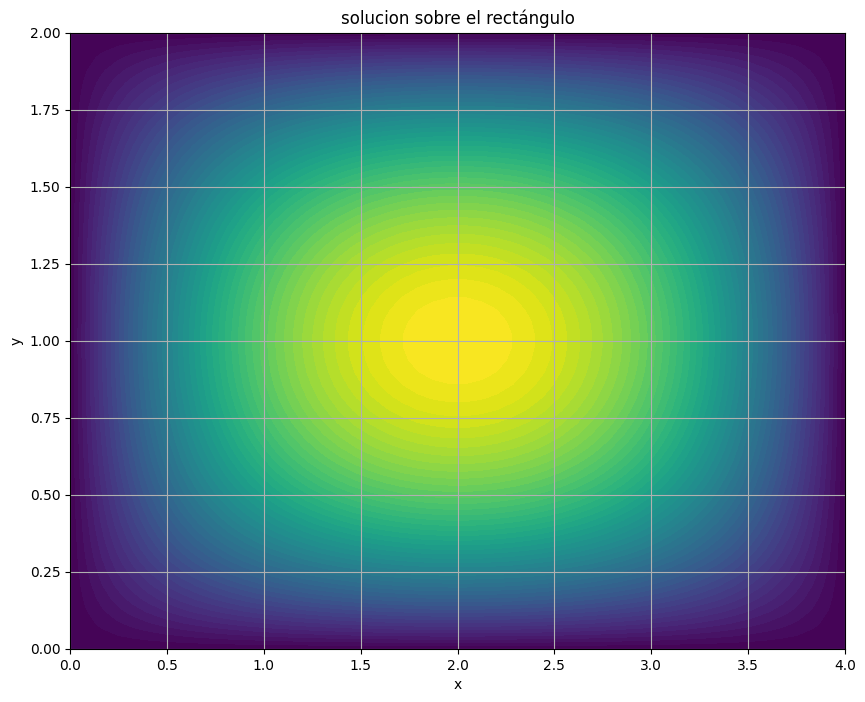

In [43]:
# Graficar la solucion rectangular
Z0 = u(X, Y, t=0)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z0, levels=50)
plt.title("solucion sobre el rectángulo")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


Observamos que en el espacio en efecto tenemos un rectangulo donde la membrana ira evolucionando con el tiempo

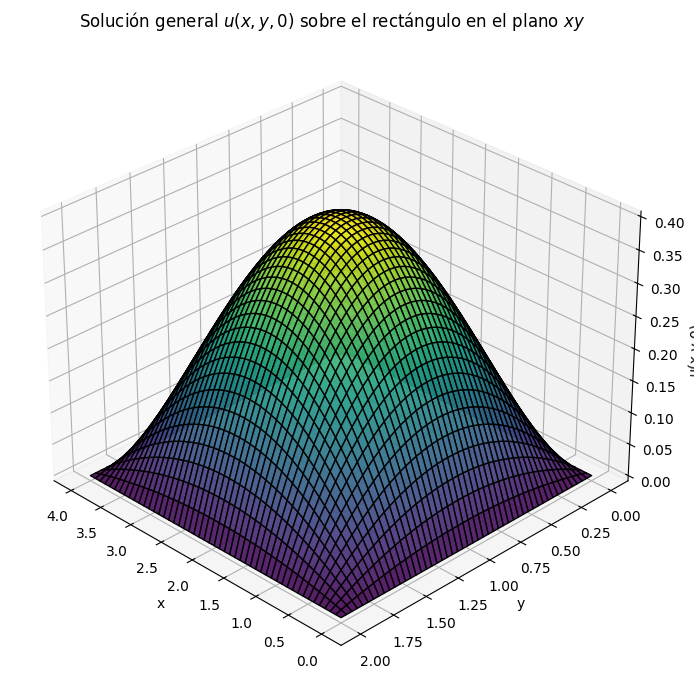

In [44]:

Z0 = u(X, Y, t=0)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z0, cmap='viridis', edgecolor='k', alpha=0.9)

ax.plot_surface(X, Y, np.zeros_like(Z0), alpha=0.05, color='gray')

ax.set_title("Solución general $u(x,y,0)$ sobre el rectángulo en el plano $xy$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u(x,y,0)")
ax.view_init(elev=30, azim=135)


plt.tight_layout()
plt.show()



Notemos las evoluciones de la mmebrana en los $t=0,1,2,3$

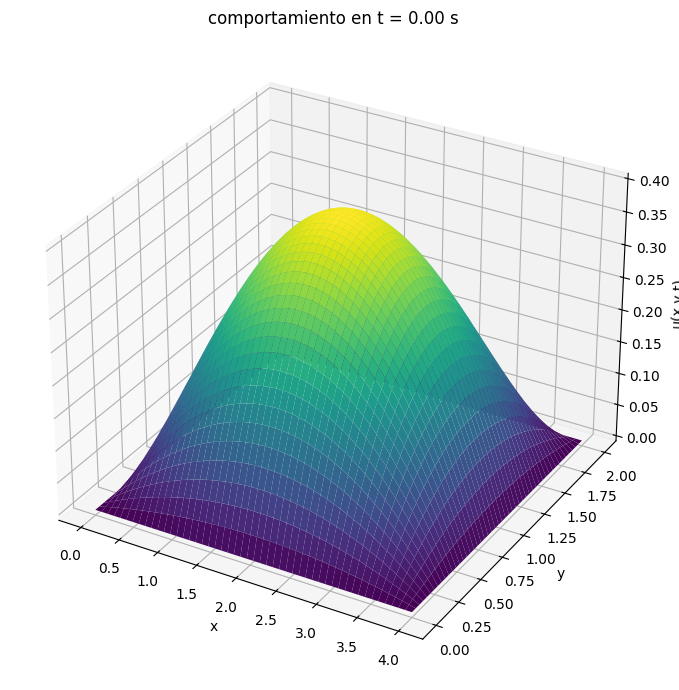

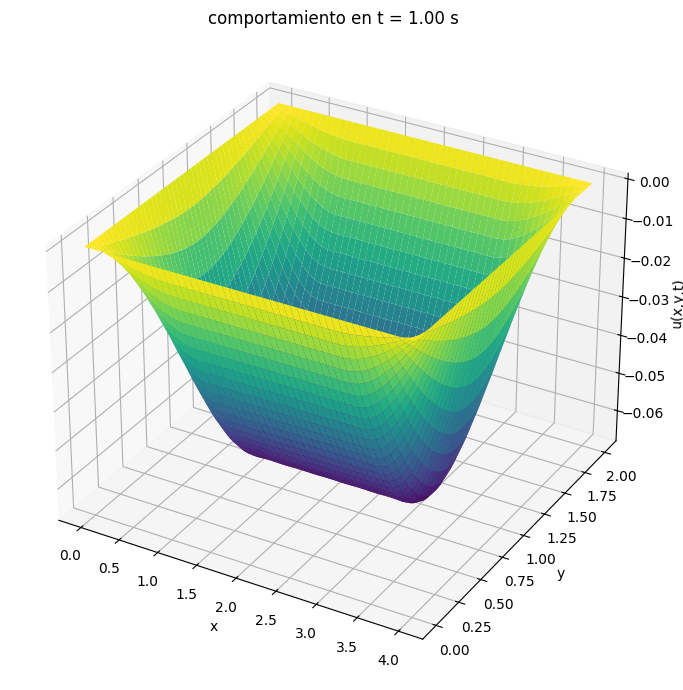

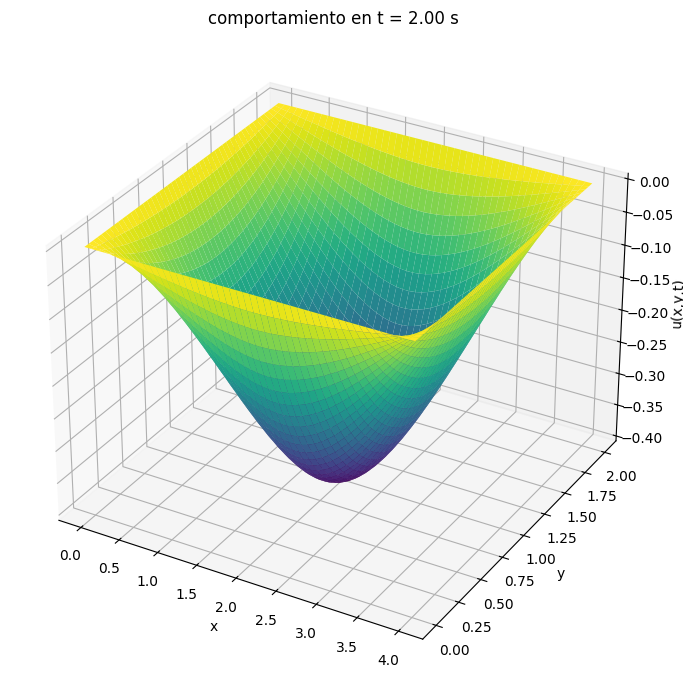

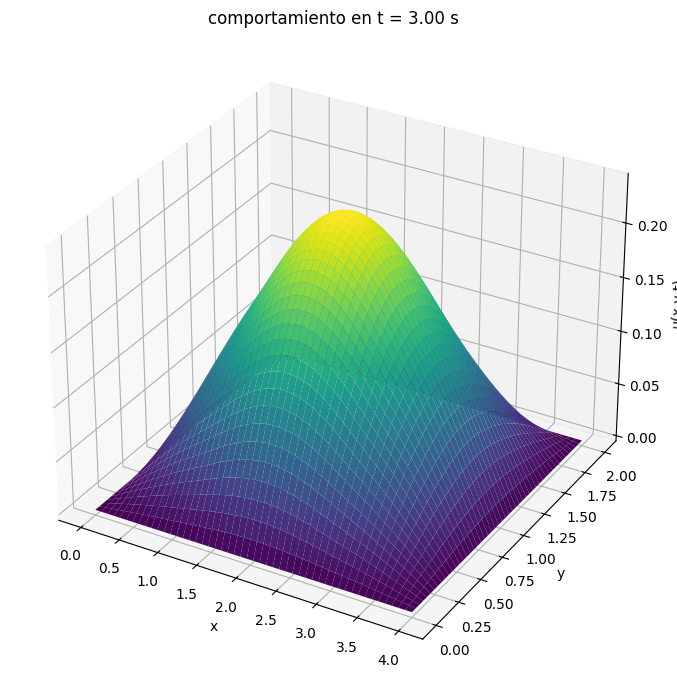

In [45]:
# Evolucion swegun el tiempo
for t in [0,1,2,3]:
    plot_surface(t)
